## Context and Objective

We want to answer to the following question:
**How much is the expected loss if we acquiere certain type of credit?**

The expected loss at a certain moment is defined as:
                                        **Expected Loss=PD×LGD×EAD**
Where:
- PD: Probability of default
- LGD: Loss given default
- EAD: Exposure at default

The objective of this analysis is to develop an interpretable framework to estimate the Probability of default (PD) of corporate borrowers using financial ratios.The model focuses on identifying early signals of financial distress and understanding the economic drivers behind default risk.

This analysis represents the first building block of a broader credit risk framework, which will later be extended to model Loss Given Default (LGD) and Exposure at Default (EAD) for applications in corporate lending, private credit and distressed debt investing.

## Data Overview


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('../data/raw/corporate_bankruptcy.csv')
df = df[df['year']==1]
df.drop('year',axis = 1, inplace=True)
df.head()



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [13]:
df.shape

(7027, 65)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      7024 non-null   float64
 1   A2      7024 non-null   float64
 2   A3      7024 non-null   float64
 3   A4      6997 non-null   float64
 4   A5      7019 non-null   float64
 5   A6      7024 non-null   float64
 6   A7      7024 non-null   float64
 7   A8      7002 non-null   float64
 8   A9      7026 non-null   float64
 9   A10     7024 non-null   float64
 10  A11     6988 non-null   float64
 11  A12     6997 non-null   float64
 12  A13     7027 non-null   float64
 13  A14     7024 non-null   float64
 14  A15     7025 non-null   float64
 15  A16     7002 non-null   float64
 16  A17     7002 non-null   float64
 17  A18     7024 non-null   float64
 18  A19     7027 non-null   float64
 19  A20     7027 non-null   float64
 20  A21     5405 non-null   float64
 21  A22     7024 non-null   float64
 22  A23  

The dataset consists of a large sample of corporate firms. Each observation represents a company at a given point in time,described by a set of numericla financial ratios.

The target value indicates wether the company entered in bankruptcy within the following year, making the data set suitable for modelling one-year Probability Default (PD).

The variables are primarily continuous and exhibit missing values, which reflect the noisy nature os real-world financial reporting.

## Target Analysis

In [16]:
df['class'].value_counts()

class
0    6756
1     271
Name: count, dtype: int64

In [17]:
df['class'].value_counts(normalize=True)

class
0    0.961434
1    0.038566
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

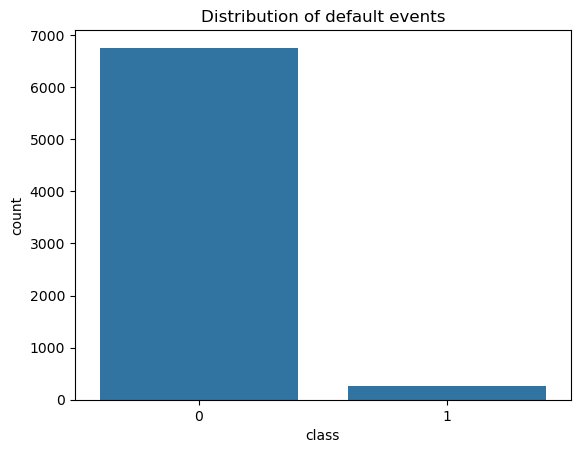

In [18]:
sns.countplot(x='class', data = df)
plt.title('Distribution of default events')
plt.show

The target variable indicates wether a firm entered bankruptcy in the following year. The distribution of the dataset is highly imbalanced, with only a small part of it representing bankrupted firms.

This imbalance reflects the reality of corporate credit-risk, where default is rare but a very significant economic event. As a consequence, standard accuracy metrics are not informative, and model performance will be later evaluated by metrics such as AUC, KS and calibration metrics.

## Ratio Selection

In [19]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51',
       'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61',
       'A62', 'A63', 'A64', 'class'],
      dtype='object')